# Pokemon Analysis
**Authors:** Ricky Wong
***

## Overview
Jim's Real Estate wants to help homeowners make the most of their property and would like to know how renovations affect house prices. Using linear regression we found two variables that affected house prices the most. Using that information, real estate agents can provide meaningful advice for homeowners.


### Business Understanding
There are a variety of variables when determining the value of a property. Creating a model for real estate agents will help them advise homewoeners about how renovating affects the value of their property. To do this we will explore house data from King County to build a basic model then reiterate the process to improve on the model.   


In [1]:
#import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import preprocessing
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.options.mode.chained_assignment = None

%matplotlib inline

In [2]:
#read data from file
pokemon_df = pd.read_csv('data/Pokemon.csv')

### Data Understanding
We have obtained house data from King County to help us build the model. This includes useful information like the price of the property, the living area in square feet and the year the poroprty was renovated to name a few.<br /> After getting an idea of the data we are dealing with we can see most of our data are numerical with some columns missing data like 'waterfront' and 'yr_renovated'. We will need to clean those up later <br /> 
There are some data which is not really relevant to our model which we can remove. 

In [3]:
kc_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
drop = ['date','view','zipcode','lat','long','sqft_living15','sqft_lot15', 'waterfront']
kc_house_data_df.drop(drop, axis=1, inplace=True)

Taking a closer look we can observe a few points
- A possible outlier with 33 bedrooms when the mean is only 3.
- Condition of the house is form 1-5
- There is a grading system from 3 - 13
- And house data from 1900 - 2015
- sqft_basement has '?' which could explain why it is an object instead of being numeric

In [5]:
kc_house_data_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915,1788.596842,1970.999676,83.636778
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200,827.759761,29.375234,399.946414
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000,370.000000,1900.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000,1560.000000,1975.000000,0.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000,9410.000000,2015.000000,2015.000000


In [6]:
kc_house_data_df.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0.0,1955,0.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400.0,1951,1991.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,0.0,1933,NaN
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910.0,1965,0.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0.0,1987,0.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530.0,2001,0.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,3,7,1715,?,1995,0.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0.0,1963,0.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730.0,1960,0.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0.0,2003,0.0


#### Continuous data
The histograms show the data being positively skewed. We will need to run log transformations to make them more normal.




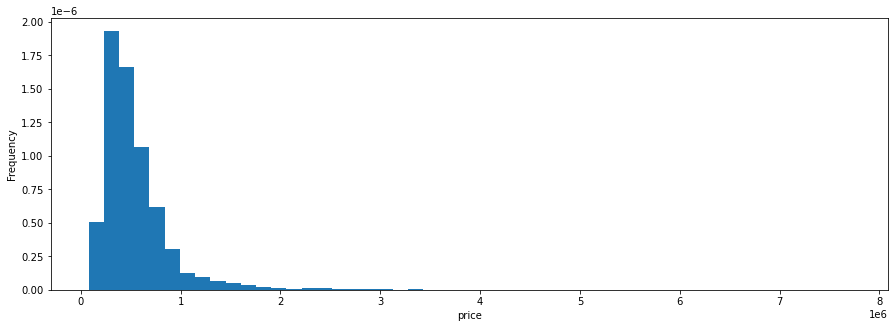

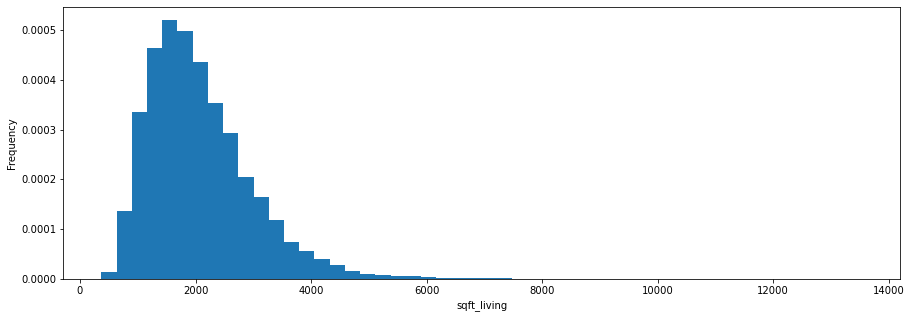

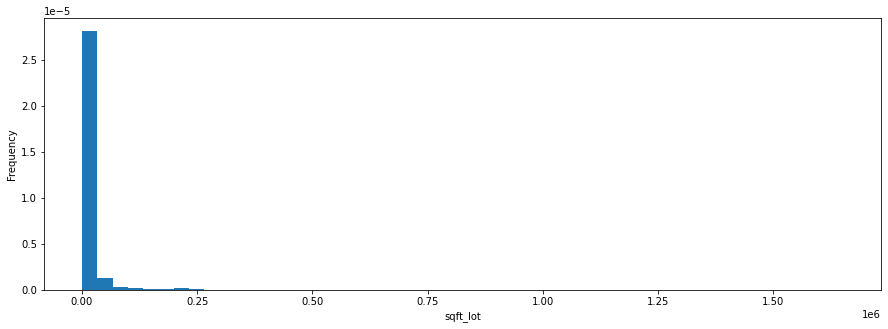

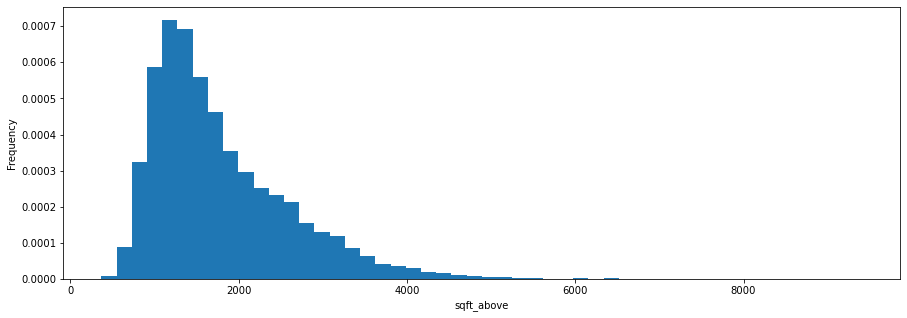

In [7]:
continuous = ['price', 'sqft_living', 'sqft_lot', 'sqft_above']

for cont in continuous:
    plt.figure(figsize=(15,5))
    kc_house_data_df[cont].plot.hist(bins=50, density=True)
    plt.xlabel(cont)
    plt.show()  

#### Categorical Data
The house with 33 bedrooms is an outlier which we can drop when cleaning <br />
We can see there wasn't many renovations happening (less than 10) until after 1982 <br />
Knowing if the property has been renovated or not would be more useful than the year the property was renovated 

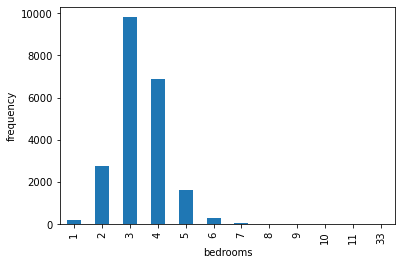

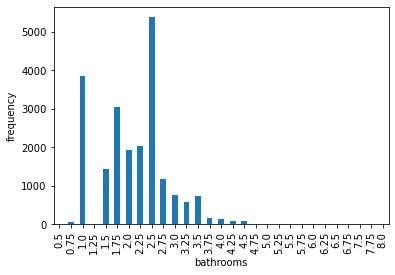

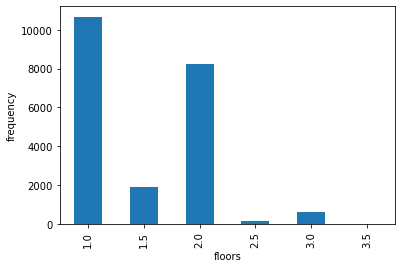

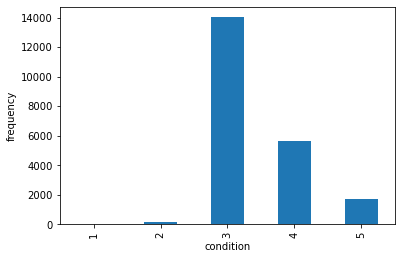

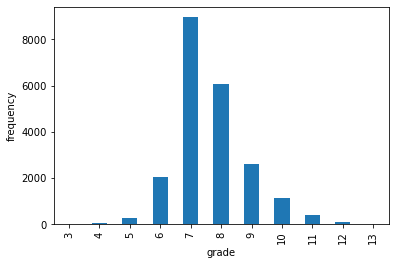

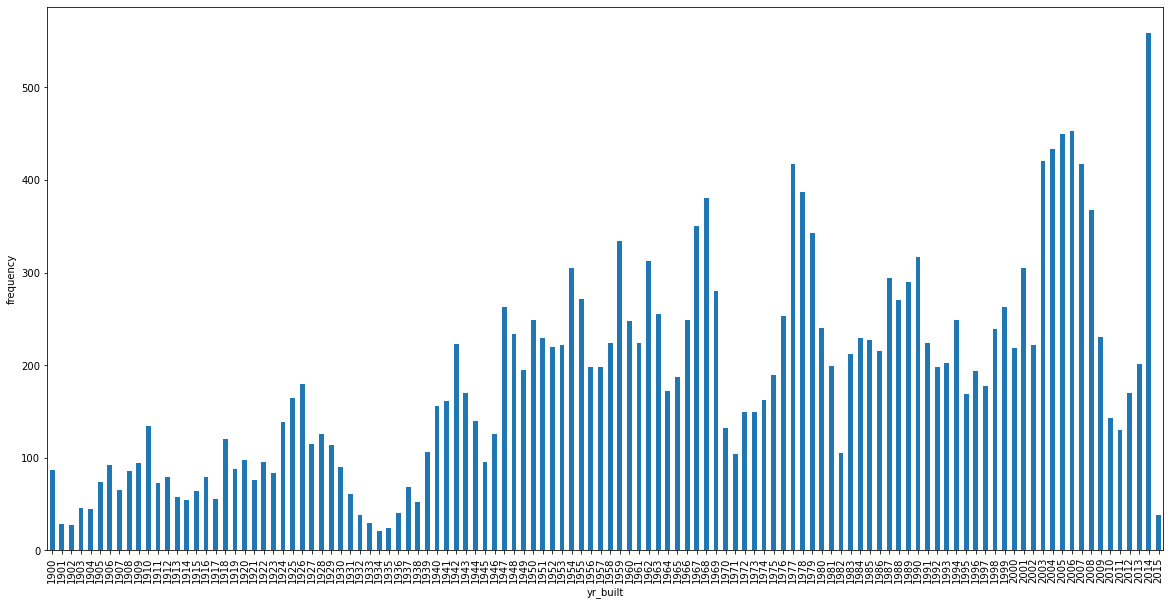

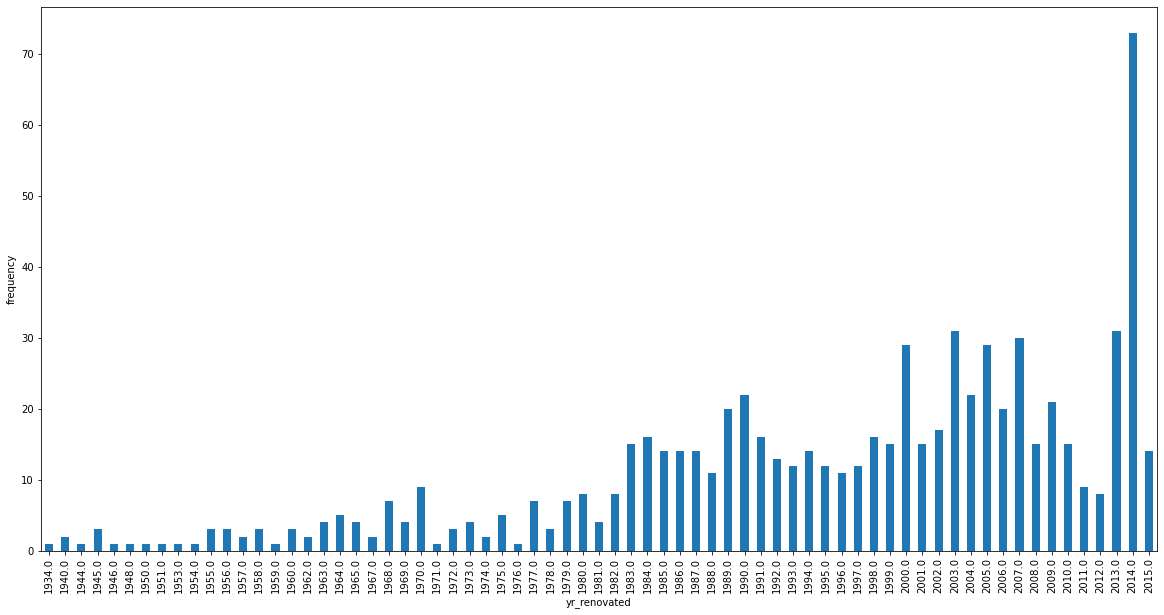

In [8]:
categorical = ['bedrooms', 'bathrooms', 'floors','condition', 'grade','yr_built']


for cat in categorical:
    if cat == 'yr_built':
        plt.figure(figsize=(20,10))
    kc_house_data_df.groupby([cat])[cat].count().plot.bar()  
    plt.ylabel('frequency')
    plt.show()

#better view of when properties were renovated    
plt.figure(figsize=(20,10))  
yr_reno = kc_house_data_df.loc[kc_house_data_df['yr_renovated'] > 0]
yr_reno.groupby(yr_reno['yr_renovated'])['yr_renovated'].count().plot.bar()
plt.ylabel('frequency')
plt.show()

### Data Preparation
We remove rows with null values in 'yr_renovated' as we don't know if they have been renovated or not. <br />
We will also remove basement values that are not numbers. We still have plenty of data to use from removing them. <br />
Remove the outlier in bedrooms

In [9]:
clean_house_data_df = kc_house_data_df.dropna(subset=['yr_renovated'])
clean_house_data_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17755 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17755 non-null  int64  
 1   price          17755 non-null  float64
 2   bedrooms       17755 non-null  int64  
 3   bathrooms      17755 non-null  float64
 4   sqft_living    17755 non-null  int64  
 5   sqft_lot       17755 non-null  int64  
 6   floors         17755 non-null  float64
 7   condition      17755 non-null  int64  
 8   grade          17755 non-null  int64  
 9   sqft_above     17755 non-null  int64  
 10  sqft_basement  17755 non-null  object 
 11  yr_built       17755 non-null  int64  
 12  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(8), object(1)
memory usage: 1.9+ MB


In [10]:
# Convert basement to numeric and remove the ones that are unknown
clean_house_data_df['sqft_basement'] = pd.to_numeric(clean_house_data_df['sqft_basement'], errors = 'coerce')
clean_house_data_df.dropna(subset=['sqft_basement'], inplace=True)
clean_house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17389 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             17389 non-null  int64  
 1   price          17389 non-null  float64
 2   bedrooms       17389 non-null  int64  
 3   bathrooms      17389 non-null  float64
 4   sqft_living    17389 non-null  int64  
 5   sqft_lot       17389 non-null  int64  
 6   floors         17389 non-null  float64
 7   condition      17389 non-null  int64  
 8   grade          17389 non-null  int64  
 9   sqft_above     17389 non-null  int64  
 10  sqft_basement  17389 non-null  float64
 11  yr_built       17389 non-null  int64  
 12  yr_renovated   17389 non-null  float64
dtypes: float64(5), int64(8)
memory usage: 1.9 MB


In [11]:
# remove outlier in bedrooms
clean_house_data_df.loc[(clean_house_data_df['bedrooms'] >= 10)].sort_values(by=['bedrooms'])
clean_house_data_df.drop(labels=15856, axis=0, inplace=True)

In [12]:
#change year to property been renovated or not
clean_house_data_df.loc[(clean_house_data_df['yr_renovated'] > 0), 'yr_renovated'] = 1
clean_house_data_df.rename(columns={'yr_renovated':'renovated'}, inplace=True)

In [13]:
#percentage of houses renovated
no_reno, yes_reno = (clean_house_data_df[['renovated']] > 0).value_counts()
(yes_reno/(yes_reno + no_reno))*100

4.158040027605245

#### Check for Multicollinearity
Variables that are highly correlated to another variable will cause problems for our regression analysis. Making the results unreliable. To fix that we look for highly correlated variables and remove some. <br />
We removed 'sqft_basement' and 'bathrooms'


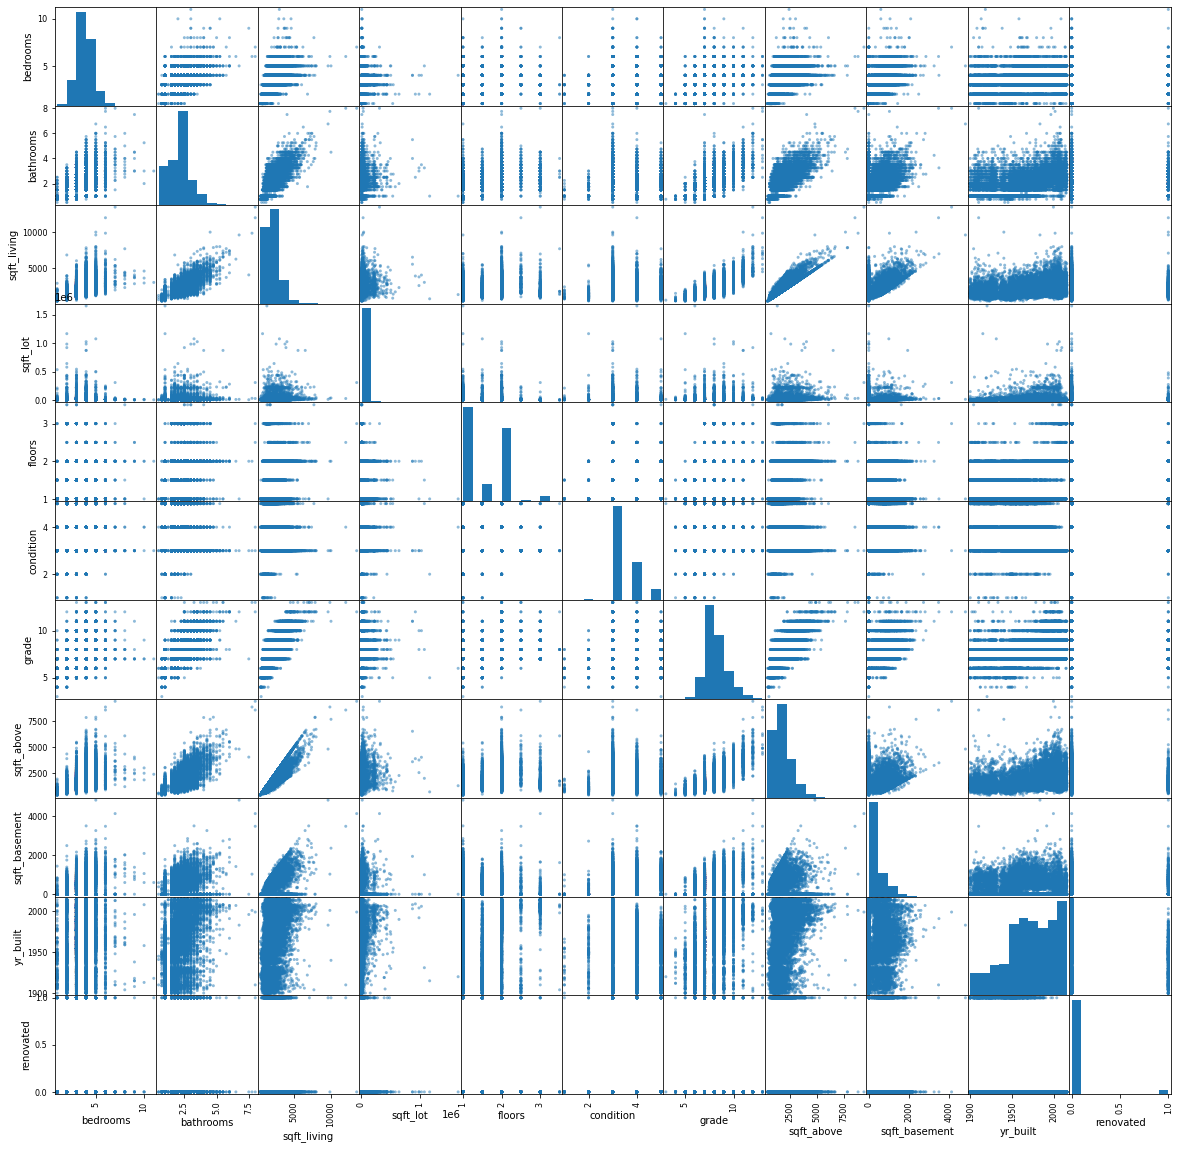

In [14]:
house_pred = clean_house_data_df.iloc[:,2:14]
pd.plotting.scatter_matrix(house_pred, figsize  = [20, 20]);
plt.show()

In [15]:
house_pred.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,renovated
bedrooms,1.000000,0.527457,0.592664,0.031053,0.185320,0.017068,0.366044,0.491095,0.310868,0.160033,0.019734
bathrooms,0.527457,1.000000,0.753504,0.085354,0.503906,-0.131313,0.665489,0.685983,0.280347,0.506510,0.051249
sqft_living,0.592664,0.753504,1.000000,0.167745,0.356532,-0.066163,0.764592,0.875885,0.436399,0.317275,0.054029
sqft_lot,0.031053,0.085354,0.167745,1.000000,-0.008833,-0.011021,0.108905,0.175682,0.019582,0.048982,0.003594
floors,0.185320,0.503906,0.356532,-0.008833,1.000000,-0.263477,0.460728,0.527141,-0.245058,0.487741,0.003153
condition,0.017068,-0.131313,-0.066163,-0.011021,-0.263477,1.000000,-0.151378,-0.161946,0.165047,-0.366227,-0.061755
grade,0.366044,0.665489,0.764592,0.108905,0.460728,-0.151378,1.000000,0.758232,0.168573,0.445345,0.016509
sqft_above,0.491095,0.685983,0.875885,0.175682,0.527141,-0.161946,0.758232,1.000000,-0.051913,0.423126,0.020692
sqft_basement,0.310868,0.280347,0.436399,0.019582,-0.245058,0.165047,0.168573,-0.051913,1.000000,-0.132352,0.073239
yr_built,0.160033,0.506510,0.317275,0.048982,0.487741,-0.366227,0.445345,0.423126,-0.132352,1.000000,-0.222935


In [16]:
df=house_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

# drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

df[(df.cc>0.75) & (df.cc <1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.875885
"(sqft_living, grade)",0.764592
"(sqft_above, grade)",0.758232
"(bathrooms, sqft_living)",0.753504


In [17]:
clean_house_data_df.drop(['sqft_basement', 'bathrooms'], axis=1, inplace=True)
clean_house_data_df.reset_index(drop=True, inplace=True)
clean_house_data_df.head()

,id,price,bedrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,renovated
0,7129300520,221900.0,3,1180,5650,1.0,3,7,1180,1955,0.0
1,6414100192,538000.0,3,2570,7242,2.0,3,7,2170,1951,1.0
2,2487200875,604000.0,4,1960,5000,1.0,5,7,1050,1965,0.0
3,1954400510,510000.0,3,1680,8080,1.0,3,8,1680,1987,0.0
4,7237550310,1230000.0,4,5420,101930,1.0,3,11,3890,2001,0.0


#### Normalise
Our data is positively skewed so we need to do log transformation to make it have a more normal distribution.
After that we need to standardise our data making the mean 0

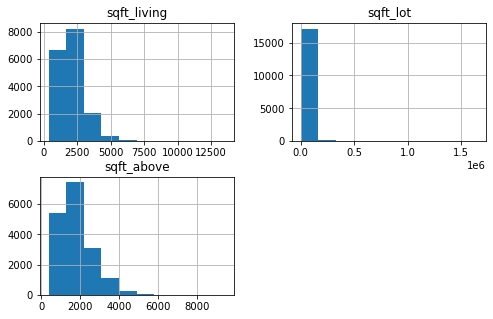

In [18]:
# original predictors
data_pred = clean_house_data_df.iloc[:,2:10]
data_pred[['sqft_living', 'sqft_lot', 'sqft_above']].hist(figsize =[8,5]);

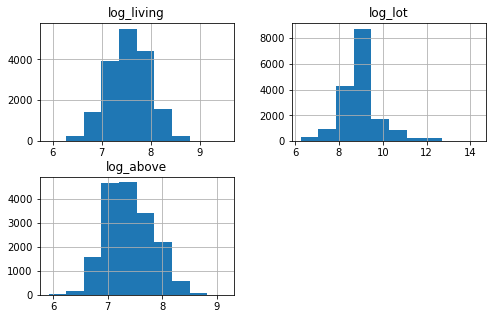

In [19]:
# predictors after log transform
data_log = pd.DataFrame([])
data_log['log_living'] = np.log(data_pred['sqft_living'])
data_log['log_lot'] = np.log(data_pred['sqft_lot'])
data_log['log_above'] = np.log(data_pred['sqft_above'])
data_log.hist(figsize =[8,5]);

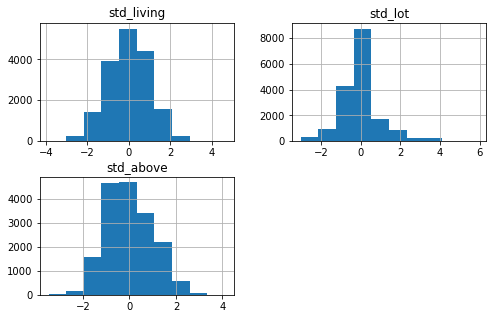

In [20]:
# standard
std_scale = preprocessing.StandardScaler().fit(data_log[['log_living', 'log_lot', 'log_above']])
df_std = std_scale.transform(data_log[['log_living', 'log_lot', 'log_above']])
standard_df = pd.DataFrame(df_std, columns=['std_living', 'std_lot', 'std_above'])
standard_df.hist(figsize=[8,5]);

In [21]:
clean_house_data_df2 = pd.concat([clean_house_data_df['price'], standard_df, clean_house_data_df['renovated']], axis=1)

#### One Hot Encode
For linear regression, categorical data should be transformed using one-hot encoding.
In order to not have so many predictors for the year built we categorised them into 5 year increments.

In [22]:
# categorise yr_built in 5 year increments
def categorise_yr(yr):
    yr_mod = yr % 10
    if yr_mod > 0 and yr_mod < 5:
        yr -= yr_mod
    elif yr_mod > 5 and yr_mod < 10:
        yr -= yr_mod - 5
    return yr
        
clean_house_data_df['yr_cat'] = clean_house_data_df['yr_built'].map(categorise_yr)

In [23]:
# dummy variable
br_dum = pd.get_dummies(clean_house_data_df['bedrooms'], prefix='br', drop_first=True)
fl_dum = pd.get_dummies(clean_house_data_df['floors'], prefix='fl', drop_first=True)
cond_dum = pd.get_dummies(clean_house_data_df['condition'], prefix='cond', drop_first=True)
gr_dum = pd.get_dummies(clean_house_data_df['grade'], prefix='grade', drop_first=True)
yb_dum = pd.get_dummies(clean_house_data_df['yr_cat'], prefix='yr_built', drop_first=True)

# add dummy variables
clean_house_data_df3 = pd.concat([clean_house_data_df2, br_dum, fl_dum, cond_dum, gr_dum, yb_dum], axis=1)
clean_house_data_df3.head()

,price,std_living,std_lot,std_above,renovated,br_2,br_3,br_4,br_5,br_6,...,yr_built_1970,yr_built_1975,yr_built_1980,yr_built_1985,yr_built_1990,yr_built_1995,yr_built_2000,yr_built_2005,yr_built_2010,yr_built_2015
0,221900.0,-1.134041,-0.391525,-0.760796,0.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,0.704189,-0.117255,0.667971,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,604000.0,0.064293,-0.526558,-1.034546,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,510000.0,-0.299745,0.003721,0.067739,0.0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1230000.0,2.466373,2.804408,2.036862,0.0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


### Modeling

In [24]:
house_df = clean_house_data_df3
#variables for categorical predictors
price = house_df[['price']]
bedrooms = house_df.iloc[:,5:15]
floors = house_df.iloc[:,15:20]
condition = house_df.iloc[:,20:24]
grade = house_df.iloc[:,24:34]
yr_built = house_df.iloc[:,34:57]

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17388 entries, 0 to 17387
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          17388 non-null  float64
 1   std_living     17388 non-null  float64
 2   std_lot        17388 non-null  float64
 3   std_above      17388 non-null  float64
 4   renovated      17388 non-null  float64
 5   br_2           17388 non-null  uint8  
 6   br_3           17388 non-null  uint8  
 7   br_4           17388 non-null  uint8  
 8   br_5           17388 non-null  uint8  
 9   br_6           17388 non-null  uint8  
 10  br_7           17388 non-null  uint8  
 11  br_8           17388 non-null  uint8  
 12  br_9           17388 non-null  uint8  
 13  br_10          17388 non-null  uint8  
 14  br_11          17388 non-null  uint8  
 15  fl_1.5         17388 non-null  uint8  
 16  fl_2.0         17388 non-null  uint8  
 17  fl_2.5         17388 non-null  uint8  
 18  fl_3.0

#### Model 1
Our first model used all the available predictors and got an R-Squared value of 0.633 which is reasonable, being able to explain 63% of variations of our model. <br />
std_above and conditions had p-values greater than 0.05 so we will remove those for the next model.

In [25]:
# all predictors
price = house_df['price']
predictors = house_df.iloc[:,1:57]
predictors_int = sm.add_constant(predictors)
model = sm.OLS(price, predictors_int).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     533.9
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:28:21   Log-Likelihood:            -2.3890e+05
No. Observations:               17388   AIC:                         4.779e+05
Df Residuals:                   17331   BIC:                         4.784e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.503e+05   2.31e+05      2.815      0.005    1.98e+05     1.1e+06
std_living     1.379e+05   4276.659     32.233      0.000    1.29e+05    1.46e+05
std_lot        -1.62e+04   2316.634     -6.994      0.000   -2.07e+04   -1.17e+04
std_above      -932.2023   4489.225     -0.208      0.836   -9731.536    7867.132
renovated      8.674e+04   9159.535      9.469      0.000    6.88e+04    1.05e+05
br_2          -4.594e+04   1.93e+04     -2.375      0.018   -8.39e+04   -8032.671
br_3          -9.772e+04   1.95e+04     -5.017      0.000   -1.36e+05   -5.95e+04
br_4          -1.324e+05      2e+04     -6.617      0.000   -1.72e+05   -9.32e+04
br_5            -9.4e+04   2.11e+04     -4.458      0.000   -1.35e+05   -5.27e+04
br_6          -7.267e+04   2.53e+04     -2.871      0.004   -1.22e+05   -2.31e+04
br_7           5526.2010   4.96e+04      0.111      0.911   -9.17e+04    1.03e+05
br_8           1.745e+05   7.15e+04      2.440      0.015    3.43e+04    3.15e+05
br_9          -1.785e+05   9.46e+04     -1.887      0.059   -3.64e+05    6923.749
br_10         -6.378e+04   1.31e+05     -0.485      0.628   -3.22e+05    1.94e+05
br_11         -3.947e+05   2.26e+05     -1.746      0.081   -8.38e+05    4.84e+04
fl_1.5        -1.217e+04   7435.389     -1.636      0.102   -2.67e+04    2408.040
fl_2.0         7148.2418   6289.004      1.137      0.256   -5178.840    1.95e+04
fl_2.5         1.036e+05   2.11e+04      4.909      0.000    6.22e+04    1.45e+05
fl_3.0         8.658e+04   1.27e+04      6.817      0.000    6.17e+04    1.11e+05
fl_3.5         1.178e+05   9.29e+04      1.269      0.205   -6.42e+04       3e+05
cond_2        -5.008e+04   5.17e+04     -0.969      0.333   -1.51e+05    5.13e+04
cond_3        -3.032e+04   4.84e+04     -0.627      0.531   -1.25e+05    6.45e+04
cond_4         1384.9881   4.84e+04      0.029      0.977   -9.35e+04    9.63e+04
cond_5         4.229e+04   4.87e+04      0.869      0.385   -5.31e+04    1.38e+05
grade_4       -3335.2368   2.31e+05     -0.014      0.988   -4.57e+05     4.5e+05
grade_5       -5.714e+04   2.26e+05     -0.253      0.800      -5e+05    3.86e+05
grade_6       -3.668e+04   2.26e+05     -0.162      0.871   -4.79e+05    4.06e+05
grade_7        4.634e+04   2.26e+05      0.205      0.837   -3.96e+05    4.89e+05
grade_8        1.545e+05   2.26e+05      0.684      0.494   -2.88e+05    5.97e+05
grade_9        3.306e+05   2.26e+05      1.463      0.144   -1.12e+05    7.74e+05
grade_10       5.889e+05   2.26e+05      2.604      0.009    1.46e+05    1.03e+06
grade_11       9.444e+05   2.26e+05      4.171      0.000    5.01e+05    1.39e+06
grade_12       1.632e+06   2.28e+05      7.165      0.000    1.19e+06    2.08e+06
grade_13       2.823e+06   2.36e+05     11.949      0.000    2.36e+06    3.29e+06
yr_built_1905  2.457e+04   2.07e+04      1.188   

#### Model 2
Removing the two predictors have lowered our R-Squared score slightly <br />
Skew and Kurtosis is still quite high <br />
Doing a QQ-plot shows it is not normal so we run log transformation on price as well.

In [26]:
data1 = house_df[['std_living', 'renovated']]
data2 = pd.concat([bedrooms, floors, grade, yr_built], axis=1)
predictors = pd.concat([data1, data2], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     587.8
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:28:21   Log-Likelihood:            -2.3900e+05
No. Observations:               17388   AIC:                         4.781e+05
Df Residuals:                   17337   BIC:                         4.785e+05
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.745e+05   2.27e+05      2.972      0.003     2.3e+05    1.12e+06
std_living     1.328e+05   3277.778     40.514      0.000    1.26e+05    1.39e+05
renovated      6.815e+04   9054.610      7.527      0.000    5.04e+04    8.59e+04
br_2          -3.806e+04   1.94e+04     -1.960      0.050   -7.61e+04       0.450
br_3          -8.783e+04   1.95e+04     -4.497      0.000   -1.26e+05   -4.95e+04
br_4          -1.212e+05   2.01e+04     -6.041      0.000   -1.61e+05   -8.19e+04
br_5          -8.199e+04   2.11e+04     -3.877      0.000   -1.23e+05   -4.05e+04
br_6          -6.271e+04   2.54e+04     -2.470      0.014   -1.12e+05   -1.29e+04
br_7           1.683e+04   4.98e+04      0.338      0.735   -8.08e+04    1.14e+05
br_8           1.908e+05   7.19e+04      2.655      0.008    4.99e+04    3.32e+05
br_9          -1.843e+05    9.5e+04     -1.939      0.052   -3.71e+05    1971.127
br_10         -4.838e+04   1.32e+05     -0.366      0.714   -3.07e+05    2.11e+05
br_11         -3.934e+05   2.27e+05     -1.731      0.083   -8.39e+05     5.2e+04
fl_1.5        -1.181e+04   7199.974     -1.641      0.101   -2.59e+04    2300.042
fl_2.0         1.233e+04   5608.036      2.198      0.028    1335.255    2.33e+04
fl_2.5         1.146e+05   2.09e+04      5.480      0.000    7.36e+04    1.56e+05
fl_3.0          1.09e+05   1.21e+04      8.980      0.000    8.52e+04    1.33e+05
fl_3.5         1.475e+05   9.33e+04      1.581      0.114   -3.53e+04     3.3e+05
grade_4       -5.935e+04   2.32e+05     -0.255      0.798   -5.15e+05    3.96e+05
grade_5        -9.82e+04   2.27e+05     -0.432      0.666   -5.44e+05    3.47e+05
grade_6       -7.345e+04   2.27e+05     -0.324      0.746   -5.18e+05    3.71e+05
grade_7        1.701e+04   2.27e+05      0.075      0.940   -4.28e+05    4.62e+05
grade_8        1.262e+05   2.27e+05      0.556      0.578   -3.19e+05    5.71e+05
grade_9        2.978e+05   2.27e+05      1.311      0.190   -1.47e+05    7.43e+05
grade_10       5.519e+05   2.27e+05      2.429      0.015    1.07e+05    9.97e+05
grade_11        9.04e+05   2.28e+05      3.973      0.000    4.58e+05    1.35e+06
grade_12       1.587e+06   2.29e+05      6.935      0.000    1.14e+06    2.04e+06
grade_13       2.781e+06   2.37e+05     11.717      0.000    2.32e+06    3.25e+06
yr_built_1905  2.773e+04   2.08e+04      1.334      0.182    -1.3e+04    6.85e+04
yr_built_1910  8816.9599   2.09e+04      0.422      0.673   -3.22e+04    4.98e+04
yr_built_1915  -626.7098   2.09e+04     -0.030      0.976   -4.16e+04    4.03e+04
yr_built_1920 -4932.6092   2.03e+04     -0.243      0.808   -4.47e+04    3.48e+04
yr_built_1925  7723.2561   1.93e+04      0.401      0.689      -3e+04    4.55e+04
yr_built_1930 -3.892e+04   2.35e+04     -1.657      0.098    -8.5e+04    7122.242
yr_built_1935 -5119.2584   2.25e+04     -0.227   

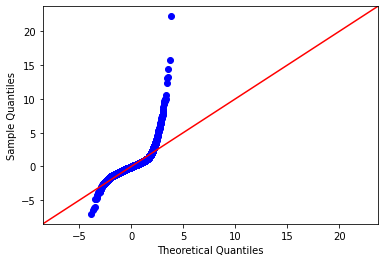

In [27]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

<AxesSubplot:>

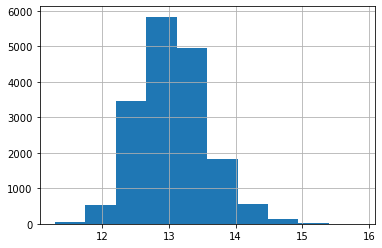

In [28]:
price = np.log(house_df['price'])
price.hist()

#### Model 3
After log transformation on price we can see if has improved the distribution to be more normal<br />
Improved Skewness from highly positive skew to slightly negative skew. Improved skew which is now between -0.5 and 0.5  meaning the data is pretty symmetrical as shown in the QQ-plot below <br />
R-Squared value has also increased to 0.646 meaning 64.6% of the variance is explained by the model.<br />


In [29]:
data1 = house_df[['std_living', 'renovated']]
data2 = pd.concat([bedrooms, floors, grade, yr_built], axis=1)
predictors = pd.concat([data1, data2], axis=1)

predictors_int = sm.add_constant(predictors)
model = sm.OLS(price, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     633.8
Date:                Sat, 11 Jun 2022   Prob (F-statistic):               0.00
Time:                        22:28:21   Log-Likelihood:                -4467.5
No. Observations:               17388   AIC:                             9037.
Df Residuals:                   17337   BIC:                             9433.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.2076      0.315     41.941      0.000      12.590      13.825
std_living        0.2268      0.005     49.874      0.000       0.218       0.236
renovated         0.0344      0.013      2.735      0.006       0.010       0.059
br_2             -0.0489      0.027     -1.817      0.069      -0.102       0.004
br_3             -0.1369      0.027     -5.050      0.000      -0.190      -0.084
br_4             -0.1696      0.028     -6.094      0.000      -0.224      -0.115
br_5             -0.1508      0.029     -5.139      0.000      -0.208      -0.093
br_6             -0.1633      0.035     -4.636      0.000      -0.232      -0.094
br_7             -0.1575      0.069     -2.279      0.023      -0.293      -0.022
br_8              0.0288      0.100      0.289      0.773      -0.167       0.224
br_9             -0.2198      0.132     -1.667      0.096      -0.478       0.039
br_10            -0.0326      0.183     -0.178      0.859      -0.392       0.327
br_11            -0.4777      0.315     -1.515      0.130      -1.096       0.140
fl_1.5            0.0006      0.010      0.056      0.955      -0.019       0.020
fl_2.0            0.0139      0.008      1.788      0.074      -0.001       0.029
fl_2.5            0.0303      0.029      1.043      0.297      -0.027       0.087
fl_3.0            0.1887      0.017     11.199      0.000       0.156       0.222
fl_3.5            0.1056      0.129      0.816      0.415      -0.148       0.359
grade_4          -0.3337      0.322     -1.035      0.301      -0.966       0.298
grade_5          -0.2638      0.315     -0.837      0.403      -0.882       0.354
grade_6          -0.0925      0.315     -0.294      0.769      -0.710       0.525
grade_7           0.1851      0.315      0.588      0.557      -0.432       0.802
grade_8           0.4256      0.315      1.351      0.177      -0.192       1.043
grade_9           0.6683      0.315      2.121      0.034       0.051       1.286
grade_10          0.9005      0.315      2.856      0.004       0.283       1.519
grade_11          1.1192      0.316      3.545      0.000       0.500       1.738
grade_12          1.3894      0.318      4.376      0.000       0.767       2.012
grade_13          1.6329      0.329      4.958      0.000       0.987       2.278
yr_built_1905     0.0069      0.029      0.239      0.811      -0.050       0.063
yr_built_1910    -0.0545      0.029     -1.879      0.060      -0.111       0.002
yr_built_1915    -0.0442      0.029     -1.526      0.127      -0.101       0.013
yr_built_1920    -0.0353      0.028     -1.253      0.210      -0.090       0.020
yr_built_1925    -0.0489      0.027     -1.831      0.067      -0.101       0.003
yr_built_1930    -0.1559      0.033     -4.781      0.000      -0.220      -0.092
yr_built_1935    -0.1078      0.031     -3.451   

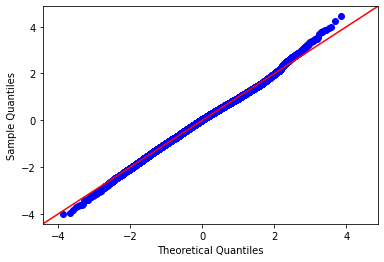

In [30]:
resid1 = model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True)

#### Homoscedasticity
Scatterplot to show homoscedasticity. No cone like pattern


Text(0, 0.5, 'Residuals')

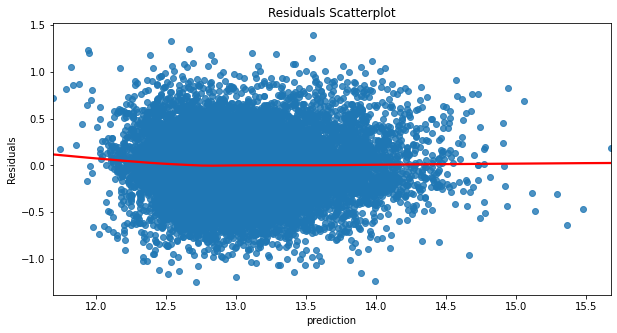

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(x=model.predict(), y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.title('Residuals Scatterplot')
plt.xlabel('prediction')
plt.ylabel('Residuals')

#### Training
With training and test MSE being similar, we can expect the model to perform similarly on different data.<br />
Accuracy of the model is 63.42


In [32]:
y = price
X = predictors
X_train, X_test, y_train, y_test = train_test_split(X, y)

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)



Train Mean Squared Error: 0.098566701529849
Test Mean Squared Error: 0.09625528458136744


In [33]:
from sklearn.metrics import r2_score

Accuracy=r2_score(y_test,y_hat_test)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 64.52


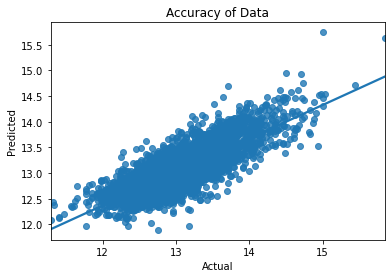

In [34]:
plot = sns.regplot(x=y_test,y=y_hat_test,ci=None).set(title='Accuracy of Data', xlabel='Actual', ylabel='Predicted');

### Conclusion

With our final model the OLS regression results tell us that the R-Squared value is 0.646 meaning 64.6% of the variance can be explained by the model. The results also tells us the skewness is -0.039 which is between -0.5 to 0.5 meaning the data is symmetrical, satisfying the normality assumption. This can also be seen from the QQ-plot with points mostly following the line. If we observed a QQ-plot like in model 2 then the distribution would be non-normal. Another assumption for linear regression is that data must be homoscedastic. To check this we created a scatterplot and did not observe any cone like shapes which would indicated the data is heteroscedastic.<br />
The living space of a property has the strongest relationship with house prices. This is determined by the t value of 49.874 which tells us how statistically significant the coefficient is. This makes sense as we spend most of the time inside the house and having a larger living area generally means more rooms or floors making it appealing to buyers. Floor had the next highest t value of 11.1 but only for 3 floors. Having more floors generally means more living area which can increase the value. Grades are also significant as it represents the quality of the home. Renovated has a t value of 2.7 which is not as high. This might be because the data for non-renovated homes heavily outweighed that of renovated homes. Analysis with a more balanced renovation data set will be required to build an appropriate model for the real estate agents to use.
